# Writing Efficient R Code

The beauty of R is that it is built for performing data analysis. The downside is that sometimes R can be slow, thereby obstructing our analysis. For this reason, it is essential to become familiar with the main techniques for speeding up your analysis, so you can reduce computational time and get insights as quickly as possible.

## The Art of Benchmarking

In order to make your code go faster, you need to know how long it takes to run. This chapter introduces the idea of benchmarking your code.

### R version
One of the relatively easy optimizations available is to use  an up-to-date version of R. In general, R is very conservative, 
so upgrading doesn't break existing code. However, a new version  will often provide free speed boosts for key functions.
The version command returns a list that contains (among other things) the major and minor version of R currently being used.

In [1]:
# Print the version details of R using version. (It's not a function.)
version
# Use dollar indexing ($) to extract the major component of version 
# and assign it to the variable major.
major <- version$major
# Likewise, extract the minor component and assign it to the 
# variable minor.
minor <-version$minor


               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

### Comparing read times of CSV and RDS files
One of the most common tasks we perform is reading in data from CSV files. However, for large CSV files this can be slow. 
One neat trick is to read in the data and save as an R binary file (rds) using saveRDS(). To read in the rds file, we use readRDS(). To benchmark the two approaches, you can use system.time().  This function returns the time taken to evaluate any 
R expression. 

In [4]:
# For example, to time how long it takes to  calculate the square root of the numbers from one to ten million,
# you would write the following:

system.time(sqrt(1:1e7))

# The file "movies.rds" contain data frame with information 
# on 45,000 movies.

# Using the system.time() function, how long does it take 
# to read in the rds file using readRDS("movies.csv").

# How long does it take to read movies from RDS?
system.time(readRDS("movies.rds"))

# fyi 
# Reading in RDS files are much quicker than reading in CSV files.

   user  system elapsed 
   0.07    0.00    0.06 

   user  system elapsed 
   0.03    0.00    0.04 

### Elapsed time

Using system.time() is convenient, but it does have its drawbacks when comparing multiple function calls. The microbenchmark 
package solves this problem with the microbenchmark() function. Load the microbenchmark package

Using microbenchmark(),sqrt(3), and 3**(1/2), compare the time it takes to do that operations. Store the result as a 
variable called compare. In your call to microbenchmark(), specify times = 10 to call each function 10 times. Print compare to see the results.

In [8]:
# install.packages("microbenchmark")
# library(microbenchmark)

# Compare the two opeartions
compare <- microbenchmark(sqrt(3),
                          3**(1/2),times = 10)

# Print compare
print(compare)

Warning message in microbenchmark(sqrt(3), 3^(1/2), times = 10):
"Could not measure a positive execution time for one evaluation."

Unit: nanoseconds
    expr min  lq  mean median  uq  max neval
 sqrt(3)   0   1 130.9    1.5 100 1001    10
 3^(1/2) 101 102 401.2  201.0 201 2600    10


### Hardware
For many problems your time is the expensive part. If having a faster computer makes you more productive, it can be cost effective to buy one.  However, before you splash out on new toys for yourself, your boss/partner  may want to see some numbers to justify the expense. Measuring the performance of your computer is called benchmarking, and you can do that with the 
benchmarkme package.

In [3]:
# Load the benchmarkme package
#install.packages("benchmarkme")
library(benchmarkme)

# Assign the variable ram to the amount of RAM on this machine
ram <- get_ram()
ram

# Assign the variable cpu to the cpu specs
cpu <- get_cpu()
cpu

Warning message:
"package 'benchmarkme' was built under R version 3.6.3"

NA B

$vendor_id
[1] "GenuineIntel"

$model_name
[1] "Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz"

$no_of_cores
[1] 12

### Benchmark machine
The benchmarkme package allows you to run a set of standardized benchmarks and compare your results to other users. One set of benchmarks tests is reading and writing speeds.

Preparing read/write io
# IO benchmarks (2 tests) for size 5 MB:
	 Writing a csv with 625000 values: 1.11 (sec).
	 Reading a csv with 625000 values: 0.23 (sec).
You are ranked 53 out of 135 machines.


Press return to get next plot 


You are ranked 46 out of 135 machines.


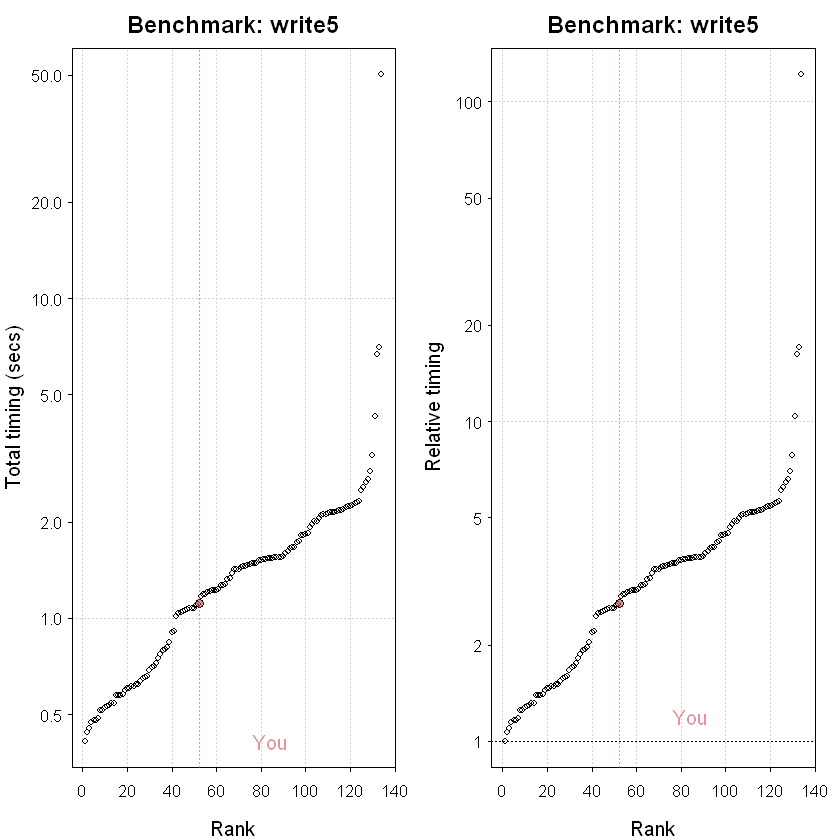

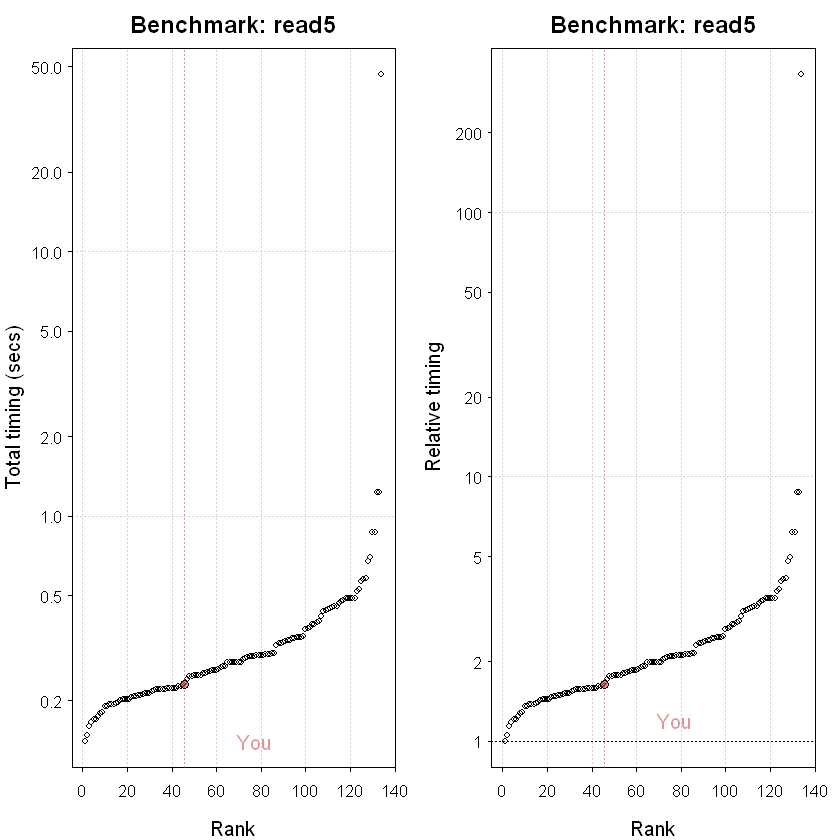

In [4]:
# Find the time it takes to read and write a 5 MB file. Assign the result to res.
# Run the io benchmark
res <-  benchmark_io(runs = 1, size = 5)

# Plot the results
plot(res)